In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
        if i > 20000:
            break
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Books_5.json.gz')

In [3]:
df.head(1)

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",1355616000,Spiritually and mentally inspiring! A book tha...,5.0,"12 16, 2012",Wonderful!


In [4]:
df.loc[:, 'reviewTime'] =  pd.to_datetime(df.loc[:, 'reviewTime'])

In [5]:
from textblob import TextBlob, Word, Blobber
import nltk

### Calculate the length of review texts

In [6]:
df['len_words'] = df['reviewText'].apply(lambda x: len(TextBlob(x).words))

In [10]:
df[['helpfulVote', 'totalVote']] = df['helpful'].apply(pd.Series)
df1 = df.drop('helpful', axis = 1)
df1.head(1)

,reviewerID,asin,reviewerName,unixReviewTime,reviewText,overall,reviewTime,summary,len_words,helpfulVote,totalVote
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,1355616000,Spiritually and mentally inspiring! A book tha...,5.0,2012-12-16,Wonderful!,22,0,0


### Make the percentage helpfulness column

In [11]:
df1['percHelpful'] = df1.helpfulVote/df1.totalVote
df1['percHelpful'] = df1['percHelpful'].fillna(0)
df1.head(1)

,reviewerID,asin,reviewerName,unixReviewTime,reviewText,overall,reviewTime,summary,len_words,helpfulVote,totalVote,percHelpful
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,1355616000,Spiritually and mentally inspiring! A book tha...,5.0,2012-12-16,Wonderful!,22,0,0,0.0


### Divide the percentage helpful column by total vote

In [12]:
df1['percbyTotal'] = df1.percHelpful/df1.totalVote
df1['percbyTotal'] = df1['percbyTotal'].fillna(0)
df1.head(1)

,reviewerID,asin,reviewerName,unixReviewTime,reviewText,overall,reviewTime,summary,len_words,helpfulVote,totalVote,percHelpful,percbyTotal
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,1355616000,Spiritually and mentally inspiring! A book tha...,5.0,2012-12-16,Wonderful!,22,0,0,0.0,0.0


In [14]:
df1 = df1[df1.percHelpful <= 1.00] # one element was more than 1.0, must be some wrong total vote.

### Plot of helpful vote vs. total vote

#### shows a linear correlation but many of them has got 0 total votes.

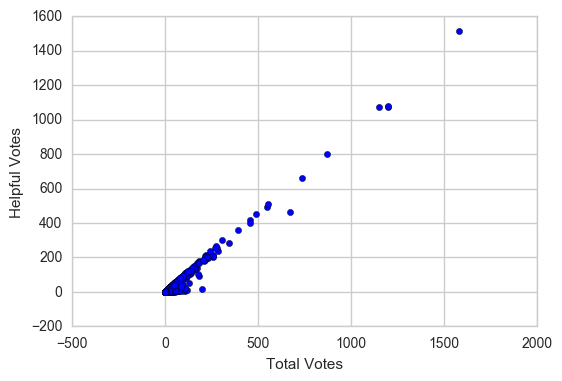

In [36]:
plt.scatter(df1.totalVote, df1.helpfulVote)
plt.xlabel('Total Votes')
plt.ylabel('Helpful Votes')

### Plot of text length vs helpful vote

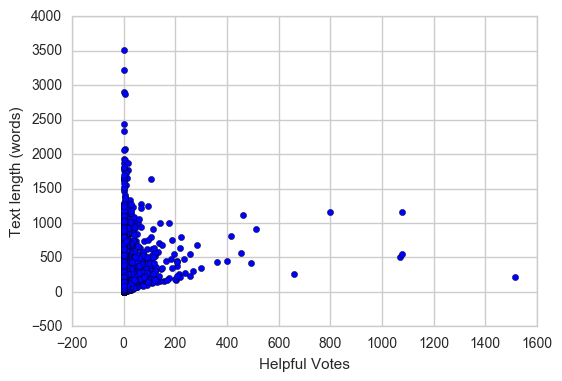

In [38]:
plt.scatter(df1.helpfulVote, df1.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Helpful Votes')

### Plot of text length vs total vote

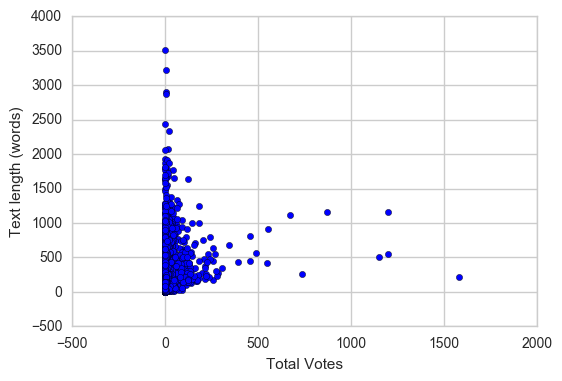

In [39]:
plt.scatter(df1.totalVote, df1.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Total Votes')

### Plot of text length vs percentage helpfulness

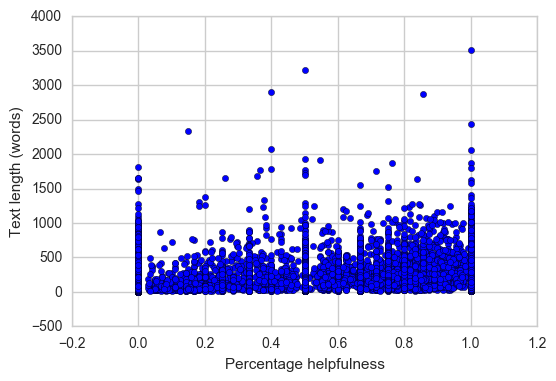

In [40]:
plt.scatter(df1.percHelpful, df1.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Percentage helpfulness')

### Plot of text length vs percentage helpfulness divided by total vote

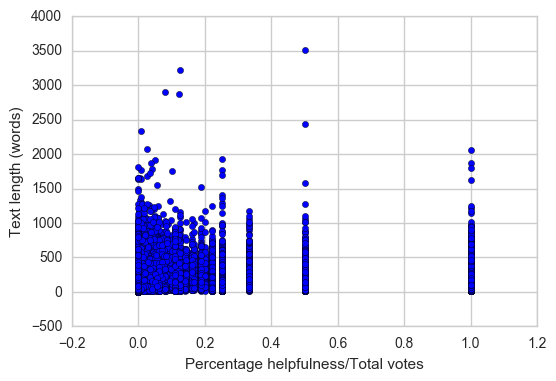

In [41]:
plt.scatter(df1.percbyTotal, df1.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Percentage helpfulness/Total votes')

### Take a subset of the dataframe when total vote is 20 or more

In [42]:
df2 = df1[df1.totalVote >= 20]
df2.head(1)

,reviewerID,asin,reviewerName,unixReviewTime,reviewText,overall,reviewTime,summary,len_words,helpfulVote,totalVote,percHelpful,percbyTotal
34,A1NPNGWBVD9AK3,000100039X,"Bruce Kendall ""BEK""",961804800,This is one of the first (literary) books I re...,5.0,2000-06-24,Simple Wisdom,291,81,92,0.880435,0.00957


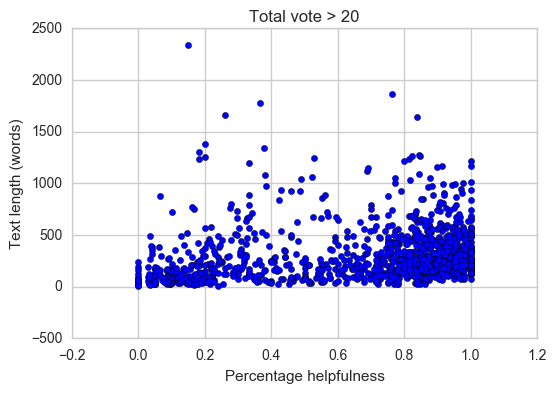

In [48]:
plt.scatter(df2.percHelpful, df2.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Percentage helpfulness')
plt.title('Total vote > 20')

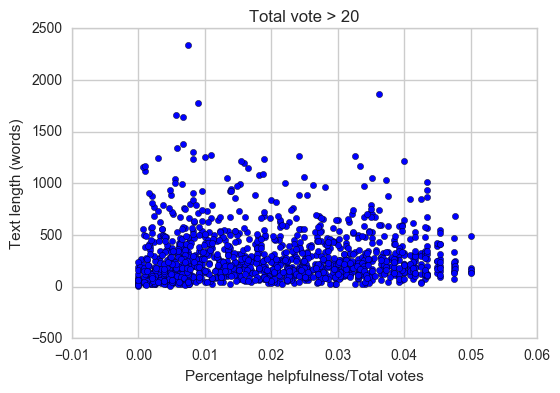

In [49]:
plt.scatter(df2.percbyTotal, df2.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Percentage helpfulness/Total votes')
plt.title('Total vote > 20')

### Take a subset of the dataframe when total vote is 5 or more

In [45]:
df3 = df1[df1.totalVote >= 5]
df3.head(1)

,reviewerID,asin,reviewerName,unixReviewTime,reviewText,overall,reviewTime,summary,len_words,helpfulVote,totalVote,percHelpful,percbyTotal
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,1033948800,A timeless classic. It is a very demanding an...,5.0,2002-10-07,A Modern Rumi,150,7,9,0.777778,0.08642


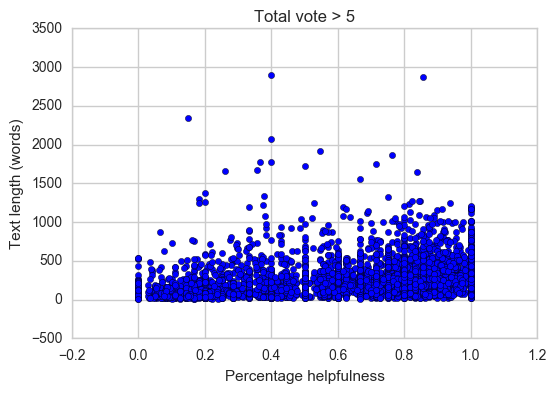

In [50]:
plt.scatter(df3.percHelpful, df3.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Percentage helpfulness')
plt.title('Total vote > 5')

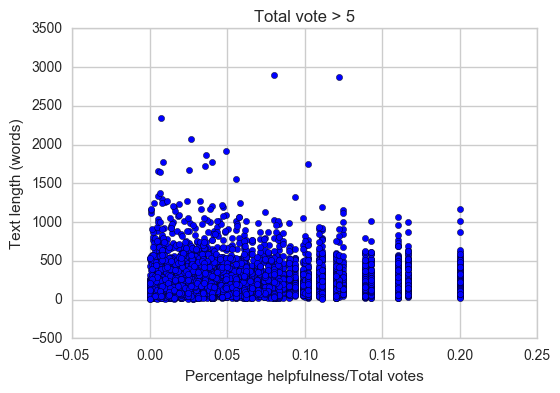

In [51]:
plt.scatter(df3.percbyTotal, df3.len_words)
plt.ylabel('Text length (words)')
plt.xlabel('Percentage helpfulness/Total votes')
plt.title('Total vote > 5')

### What happens when I take rows with more than 20 total votes

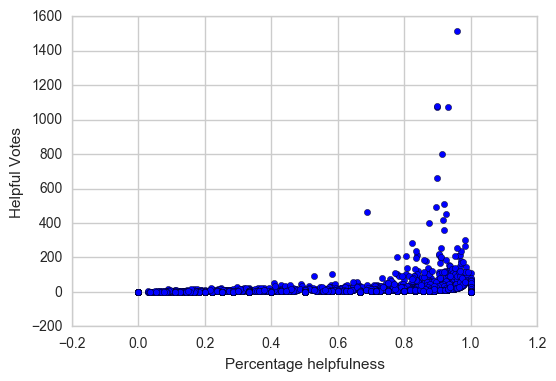

In [58]:
plt.scatter(df1.percHelpful, df1.helpfulVote)
plt.xlabel('Percentage helpfulness')
plt.ylabel('Helpful Votes')
#plt.ylim([-20, 100])

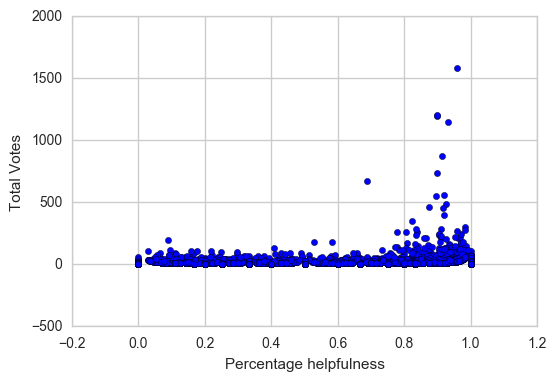

In [59]:
plt.scatter(df1.percHelpful, df1.totalVote)
plt.xlabel('Percentage helpfulness')
plt.ylabel('Total Votes')
#plt.ylim([-20, 100])

(-20, 100)

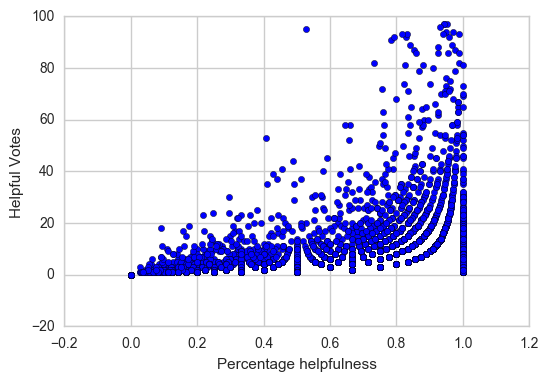

In [60]:
plt.scatter(df1.percHelpful, df1.helpfulVote)
plt.xlabel('Percentage helpfulness')
plt.ylabel('Helpful Votes')
plt.ylim([-20, 100])

(-20, 100)

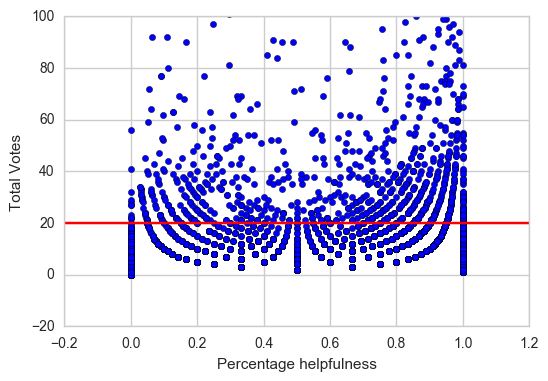

In [62]:
plt.scatter(df1.percHelpful, df1.totalVote)
plt.xlabel('Percentage helpfulness')
plt.ylabel('Total Votes')
plt.axhline(y = 20, color = 'red')
plt.ylim([-20, 100])